# this is to check effect: (1) Dcross=1.5e-12 and 1.5e-10; (2) De and sigma_e: lansde and con; (3) EC:EMC=3:7

In [11]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [12]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
Target  = 'ECEMC_3_7_Poster/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [13]:
# Define 3 models: normal DFN, single transport by high Dec, double transport
Model_DFN  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "single no consume wo refill",
    "electrolyte conductivity": "full"  ,}) 
""" Model_SD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "full"  ,})  """
Model_DD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "sol full"  ,}) 
Model_All =[ Model_DFN,   Model_DD ]
Str_model =[ 'Model_DFN',   'Model_DD' ]
Para_All = []
for i in range(0,4):
    para=pybamm.ParameterValues("Li2023_ECdrag")
    para.update({"EC initial concentration in electrolyte [mol.m-3]":3500})
    para.update({"Typical EC concentration [mol.m-3]":3500})
    #para.update({"Background solvent concentration [mol.m-3]":7000})
    Para_All.append(para)
# Landesf - high Dx; 
Para_All[0].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_10})
Para_All[0].update({"Cation transference number":electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[0].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[0].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con})
# Landesf - low Dx; 
Para_All[1].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_12})
Para_All[1].update({"Cation transference number":electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[1].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con})
Para_All[1].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con})
# Constant - high Dx; 
Para_All[2].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_10})
Para_All[2].update({"Cation transference number":t_0plus_constant})
Para_All[2].update({"Electrolyte conductivity [S.m-1]":cond_constant})
Para_All[2].update({"Electrolyte diffusivity [m2.s-1]":diff_constant})
# Constant - low Dx; 
Para_All[3].update({"EC Lithium ion cross diffusivity [m2.s-1]":Cross_diffusivity_1p5E_12})
Para_All[3].update({"Cation transference number":t_0plus_constant})
Para_All[3].update({"Electrolyte conductivity [S.m-1]":cond_constant})
Para_All[3].update({"Electrolyte diffusivity [m2.s-1]":diff_constant})
Str_para = ['Landesf-H Dx', 'Landesf-L Dx', 'Constant-H Dx', 'Constant-L Dx']
var_pts = {
    "x_n": 10,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 10,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}

In [101]:
# all parameter: 2*2*4*2 = 32
TDF_Dis_All = [];Rate_Dis_All = [0.5, 1,1.5, 2,2.25,2.5 ,2.75, 3, ];  Rate_Cha_All = [1 ];
k=0
for i in range(0,2):
    TDF_i_All = []; para = Para_All[i]; str_para = Str_para[i];
    for model,str_model in zip(Model_All,Str_model):
        TDF_i_All.append(
            Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para,var_pts)
            )
        k += 1
        print(f"Doing {k} scan C rate")
    TDF_Dis_All.append(TDF_i_All)
    del TDF_i_All

Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 1 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Finish one cycle


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Finish one cycle
Doing 2 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 3 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 4 scan C rate


In [15]:
# all parameter: 2*2*4*2 = 32
TDF_Cha_All = [];Rate_Dis_All = [1, ];  Rate_Cha_All = [0.5, 1,2, 3,  ];
k=0
for i in range(0,2):
    TDF_i_All = []; para = Para_All[i]; str_para = Str_para[i];
    for model,str_model in zip(Model_All,Str_model):
        TDF_i_All.append(
            Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para,var_pts)
            )
        k += 1
        print(f"Doing {k} scan C rate")
    TDF_Cha_All.append(TDF_i_All)
    del TDF_i_All

Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 1 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 2 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 3 scan C rate
Finish one cycle
Finish one cycle
Finish one cycle
Finish one cycle
Doing 4 scan C rate


In [6]:
# Niall's C rate test on fresh cell
Exp_Crate = [0.2, 0.3, 0.4, 0.5, 1, 2, 3]; Exp_Cap = [ 4.815, 4.75, 4.82, 4.82, 4.64, 3.298, 1.983]; 

In [22]:
Rate_Dis_All = [0.5, 1,2, 3, ];  Rate_Cha_All = [0.5, 1,2, 3,  ];

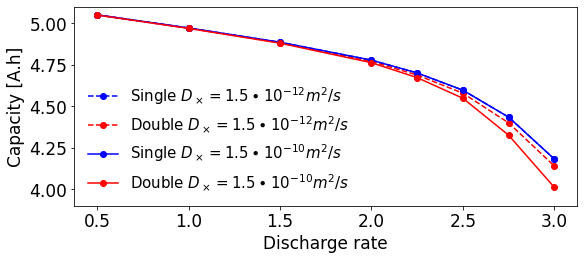

In [103]:
# plot the effect of charge / discharge rate and Dx
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Str=[ 'DFN',   'Double trans' ]; # Str_model =[ 'Model_DFN',   'Model_DD' ]
fig, axs = plt.subplots( figsize=(8, 3.5), layout='constrained')
Colors = ['b','r',];LS = ['-','--'];MS=['o','^','h']
# high Dx: TDF_Dis_All[0]       low Dx: TDF_Dis_All[1]
# single:  TDF_Dis_All[i][0]    double: TDF_Dis_All[i][1]
# single high Dx: TDF_Dis_All[0][0] low Dx: TDF_Dis_All[1][0]     
# double high Dx: TDF_Dis_All[0][1] low Dx: TDF_Dis_All[1][1]     

# low Dx [0]
axs.plot(Rate_Dis_All,TDF_Dis_All[1][0]['Cap_Dis_All'],color=Colors[0],linestyle=LS[1],marker = MS[0],label=r"Single $D_\times=1.5\bullet10^{-12}  m^2/s$")
axs.plot(Rate_Dis_All,TDF_Dis_All[1][1]['Cap_Dis_All'],color=Colors[1],linestyle=LS[1],marker = MS[0],label=r"Double $D_\times=1.5\bullet10^{-12}  m^2/s$")
# high Dx [1]
axs.plot(Rate_Dis_All,TDF_Dis_All[0][0]['Cap_Dis_All'],color=Colors[0],linestyle=LS[0],marker = MS[0],label=r"Single $D_\times=1.5\bullet10^{-10}  m^2/s$")
axs.plot(Rate_Dis_All,TDF_Dis_All[0][1]['Cap_Dis_All'],color=Colors[1],linestyle=LS[0],marker = MS[0],label=r"Double $D_\times=1.5\bullet10^{-10}  m^2/s$")


""" axs[0].plot(Rate_Cha_All,TDF_Cha_All[0][0]['Cap_Cha_All'],color=Colors[0],linestyle=LS[0],marker = MS[0],label="Single-High Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[1][0]['Cap_Cha_All'],color=Colors[0],linestyle=LS[1],marker = MS[0],label="Single-Low Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[0][1]['Cap_Cha_All'],color=Colors[1],linestyle=LS[0],marker = MS[0],label="Double-High Dx")
axs[0].plot(Rate_Cha_All,TDF_Cha_All[1][1]['Cap_Cha_All'],color=Colors[1],linestyle=LS[1],marker = MS[0],label="Double-Low Dx") """
axs.set_ylabel("Capacity [A.h]")
axs.set_xlabel("Discharge rate")
axs.set_xlabel("Discharge rate")
axs.set_ylim(3.9,5.1);   # axs[1].set_ylim(3.9,5.1)

#axs[0].set_title(r"$D_\times=1.5\bullet10^{-12}  m^2/s$", fontdict={'family':'DejaVu Sans','size':fs})
#axs[1].set_title(r"$D_\times=1.5\bullet10^{-10}  m^2/s$", fontdict={'family':'DejaVu Sans','size':fs})
axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False,)
#axs.legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False,)
plt.savefig(BasicPath + Target+"Fig. 1-Summary Crate.png", dpi=600)

In [ ]:
o=0; 
sol_DFN = TDF_All_All[o][0]['MyDict_All'][3]['Solution']  # Rate_Dis_All = [0.5,2,4,6,8,10]
time_DFN = (sol_DFN.cycles[0].steps[1]['Time [s]'].entries-sol_DFN.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_DD = TDF_All_All[o][2]['MyDict_All'][3]['Solution']  # Rate_Dis_All = [0.5,2,4,6,8,10]
time_DD = (sol_DD.cycles[0].steps[1]['Time [s]'].entries-sol_DD.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()


In [ ]:
t_select = min(time_DFN[-2],time_DD[-2])
print(t_select)
i_DD = time_DD.index(t_select)
i_DF = time_DFN.index(t_select)
print(i_DD,i_DF)
print(time_DD[i_DD],time_DFN[i_DF],)

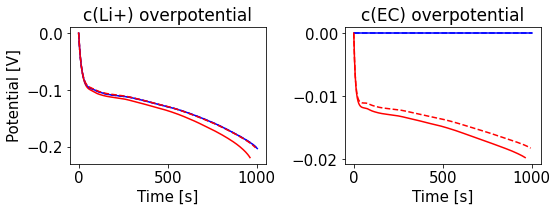

In [83]:
# for poster: to plot only c_EC and c_Li+ and - 3C discharge only
# single high Dx: TDF_Dis_All[0][0] low Dx: TDF_Dis_All[1][0]     
# double high Dx: TDF_Dis_All[0][1] low Dx: TDF_Dis_All[1][1]   
Crate_index = 3;   
fig, axs = plt.subplots(1,2, figsize=(8,3.2),tight_layout=True)

sol = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 

sol = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[0],label=r"Double-High $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[0],label=r"Double-High $D_\times$") 

sol = TDF_Dis_All[1][0]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[1],label=r"Single-Low $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[0],linestyle=LS[1],label=r"Single-Low $D_\times$") 

sol = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
axs[0].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged battery concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[1],label=r"Double-Low $D_\times$") 
axs[1].plot(
    sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0], 
    sol.cycles[0].steps[1]["X-averaged EC concentration overpotential [V]"].entries,
    color=Colors[1],linestyle=LS[1],label=r"Double-Low $D_\times$") 
axs[0].set_ylabel("Potential [V]")
axs[1].set_xlabel("Time [s]")
axs[0].set_xlabel("Time [s]")
# axs[0].set_ylim(-0.24,0); axs[1].set_ylim(-0.24,0);
# axs[0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
axs[0].set_title(r"c(Li+) overpotential",fontdict={'family':'DejaVu Sans','size':fs})
axs[1].set_title(r"c(EC) overpotential",fontdict={'family':'DejaVu Sans','size':fs})
plt.savefig(BasicPath + Target+"Fig. 2 - 3C discharge vol decompos.png", dpi=600)

Time selected is 961.9999999999998 and 962.0,962.0 ,962.0 s


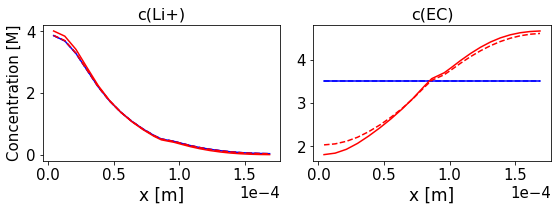

In [96]:
# compare electrolyte properties: roughly end of 6C discharge, but make it fair
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte concentration [mol.m-3]",
    "EC concentration [mol.m-3]",
]
Title_keys = [
    "c(Li+)",
    "c(EC)",
]
Colors = ['b','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Double' ]

Crate_index = 3  # Rate_Dis_All = [0.5,2,4,6,8,10]
sol_Single_High = TDF_Dis_All[0][0]['MyDict_All'][Crate_index]['Solution']
time_Single_High = (sol_Single_High.cycles[0].steps[1]['Time [s]'].entries-sol_Single_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()
sol_Double_High = TDF_Dis_All[0][1]['MyDict_All'][Crate_index]['Solution']
time_Double_High = (sol_Double_High.cycles[0].steps[1]['Time [s]'].entries-sol_Double_High.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Single_Low = TDF_Dis_All[1][0]['MyDict_All'][Crate_index]['Solution']
time_Single_Low = (sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Single_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_Double_Low = TDF_Dis_All[1][1]['MyDict_All'][Crate_index]['Solution']
time_Double_Low = (sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries-sol_Double_Low.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

t_select = min(time_Single_High[-2],time_Double_High[-2],time_Single_Low[-2],time_Double_Low[-2])
i_Single_High = FindClose(time_Single_High,t_select)
i_Double_High = FindClose(time_Double_High,t_select)
i_Single_Low = FindClose(time_Single_Low,t_select)
i_Double_Low = FindClose(time_Double_Low,t_select)

print(f'Time selected is {time_Single_High[i_Single_High]} and {time_Double_High[i_Double_High]},{time_Single_Low[i_Single_Low]} ,{time_Double_Low[i_Double_Low]} s')

fig, axs = plt.subplots(1,2, figsize=(8,3.2),tight_layout=True)
for i in range(2):
    x_Single_High =   sol_Single_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_High =   sol_Single_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_High]
    x_Single_Low =   sol_Single_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Single_Low =   sol_Single_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Single_Low]
    x_Double_High =   sol_Double_High.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_High =   sol_Double_High.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_High]
    x_Double_Low =   sol_Double_Low.cycles[0].steps[1][x_loc[i]].entries[:,0]
    y_Double_Low =   sol_Double_Low.cycles[0].steps[1][var_elely[i]].entries[:,i_Double_Low]
    axs[i].plot(x_Single_High, y_Single_High/1e3, color=Colors[0],linestyle=LS[0],label=r"Single-High $D_\times$") 
    axs[i].plot(x_Single_Low, y_Single_Low/1e3, color=Colors[0],linestyle=LS[1],label=r"Single-Low $D_\times$") 
    axs[i].plot(x_Double_High, y_Double_High/1e3, color=Colors[1],linestyle=LS[0],label=r"Double-High $D_\times$") 
    axs[i].plot(x_Double_Low, y_Double_Low/1e3, color=Colors[1],linestyle=LS[1],label=r"Double-Low $D_\times$") 
    axs[i].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
    axs[i].set_xlabel(x_loc[0],   fontdict={'family':'DejaVu Sans','size':fs})
    axs[i].ticklabel_format( 
        axis='x', style='sci',
        scilimits=[-0.01,0.01], useOffset=None, 
        useLocale=None, useMathText=None)
axs[0].set_ylabel("Concentration [M]")
# axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
""" axs[0,0].set_ylim(-1.7,0.0)
axs[0,1].set_ylim(3500,9000)
axs[0,2].set_ylim(-100,5000)
axs[1,0].set_ylim(0.3,1.0)
axs[1,1].set_ylim(-0.1,1.5)
axs[1,2].set_ylim(-0.1e-10,1e-9) """

# fig.suptitle(f"3C Discharge, t={round(t_select)} s", fontsize=fs+1)
plt.savefig(BasicPath +  Target+ f"3C Discharge, t={round(t_select)} s concentration profile.png", dpi=600)  

In [56]:
# single cases potential decomposition:
# Str_para = ['Landesf-1', 'Landesf-5', 'Landesf-15', '15-1','15-5','15-15']
# Rate_Dis_All = [0.5,2,4,6,8,10]
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
Colors = ['b','r',];LS = ['-','--',];MS=['o','^','h'];Str=[ 'DFN',   'Double trans' ]
for o in range(0,4):
    fig, axs = plt.subplots(2,3, figsize=(12,7),tight_layout=True)
    Keys_t_var = [
        "Battery voltage [V]",
        "X-averaged battery reaction overpotential [V]",
        "X-averaged battery concentration overpotential [V]",
        "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
        "X-averaged battery electrolyte ohmic losses [V]",
        "X-averaged battery solid phase ohmic losses [V]",
    ]
    Title_keys = [
        "Battery voltage",
        "Reaction overpotential",
        "c(Li+) overpotential",
        "c(EC) overpotential",
        "Elely ohmic losses",
        "Solid ohmic losses"
    ]
    for k in range(0,2):
        Crate_index = 2 # Rate_Dis_All = [0.5,2,4,6,8,10]
        sol = TDF_Dis_All[o][k]['MyDict_All'][Crate_index]['Solution'] # Rate_Dis_All = [0.5,2,4,6,8,10]
        time_1 = sol.cycles[0].steps[1]['Time [s]'].entries-sol.cycles[0].steps[1]['Time [s]'].entries[0]
        for i in range(0,6): # 0 1 2 3 4 5 --> [0,0] [0,1], [0,2], [1,0], [1,1], [1,2]   
            var =  sol.cycles[0].steps[1][Keys_t_var[i]].entries
            if i < 3:
                m=0; n =i
            else:
                m=1; n=i-3
            axs[m,n].plot(time_1, var,color=Colors[k],linestyle=LS[k],label=Str[k]) # label="1st cycle"
            axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
            axs[m,n].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
            axs[m,n].set_xlabel('Time [s]',   fontdict={'family':'DejaVu Sans','size':fs})
            #axs[m,n].set_ylim(-1.2,0.5)
            
            labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
        axs[0,0].set_ylim(2.49,4.2)
    fig.suptitle(f"{Str_para[o]},{Rate_Dis_All[Crate_index]}C Dis", fontsize=fs+1) # Str_para[k]
    """ plt.savefig(
        BasicPath + Target+ Str_para[o]
        +f" {Rate_Dis_All[Crate_index]}C dis - Single case vol decompos.png", 
        dpi=300) #""" 

SyntaxError: EOF while scanning triple-quoted string literal (2849182787.py, line 49)

In [ ]:
# compare electrolyte properties: roughly end of 6C discharge, but make it fair
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte potential [V]",
    "EC concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    "EC transference number",
    "Electrolyte conductivity [S.m-1]",
    "Electrolyte diffusivity [m2.s-1]",
]
Title_keys = [
    "Elely potential [V]",
    "c(EC) [mol.m-3]",
    "c(Li+) [mol.m-3]",
    "EC transference number",
    "Elely conductivity [S.m-1]",
    "Diff_e",
]
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Double' ]
for o in range(0,4):
    fig, axs = plt.subplots(2,3, figsize=(10,6),tight_layout=True)
    for i in range(0,6):
        # Plot only DFN and double, ignore single 
        Crate_index = 3  # Rate_Dis_All = [0.5,2,4,6,8,10]
        # select the same time:
        sol_DFN = TDF_All_All[o][0]['MyDict_All'][Crate_index]['Solution']
        time_DFN = (sol_DFN.cycles[0].steps[1]['Time [s]'].entries-sol_DFN.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

        sol_DD = TDF_All_All[o][1]['MyDict_All'][Crate_index]['Solution'] 
        time_DD = (sol_DD.cycles[0].steps[1]['Time [s]'].entries-sol_DD.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

        t_select = min(time_DFN[-2],time_DD[-2])
        i_DD = FindClose(time_DD,t_select)
        i_DF = FindClose(time_DFN,t_select)
        # print(f'Time selected is {time_DD[i_DF]} and {time_DFN[i_DD]} s')
        
        x_DFN =   sol_DFN.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_DFN =   sol_DFN.cycles[0].steps[1][var_elely[i]].entries[:,i_DF]
        x_DD  =   sol_DD.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_DD  =   sol_DD.cycles[0].steps[1][var_elely[i]].entries[:,i_DD]
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(x_DFN, y_DFN,color=Colors[0],linestyle=LS[0],label=Str[0]) 
        axs[m,n].plot(x_DD,  y_DD, color=Colors[2],linestyle=LS[2],label=Str[1]) 
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
        axs[m,n].set_xlabel(x_loc[i],   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].ticklabel_format( 
            axis='x', style='sci',
            scilimits=[-0.01,0.01], useOffset=None, 
            useLocale=None, useMathText=None)

        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
        """ axs[0,0].set_ylim(-1.7,0.0)
        axs[0,1].set_ylim(3500,9000)
        axs[0,2].set_ylim(-100,5000)
        axs[1,0].set_ylim(0.3,1.0)
        axs[1,1].set_ylim(-0.1,1.5)
        axs[1,2].set_ylim(-0.1e-10,1e-9) """
    
    fig.suptitle(f"{Str_para[o]},{Rate_Dis_All[Crate_index]}C Dis, t={round(t_select)} s", fontsize=fs+1)
    plt.savefig(
        BasicPath + Target+ Str_para[o]
        +f" end of {Rate_Dis_All[Crate_index]}C dis - electrolyte properties.png", 
        dpi=300)  

In [ ]:
Crate_index = 3; o=0
sol_DFN = TDF_All_All[o][0]['MyDict_All'][Crate_index]['Solution']
time_DFN = (sol_DFN.cycles[0].steps[1]['Time [s]'].entries-sol_DFN.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

sol_DD = TDF_All_All[o][2]['MyDict_All'][Crate_index]['Solution'] 
time_DD = (sol_DD.cycles[0].steps[1]['Time [s]'].entries-sol_DD.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

t_select = min(time_DFN[-2],time_DD[-2])
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i

i_DD = FindClose(time_DD,t_select)
i_DF = FindClose(time_DFN,t_select)
print(i_DD,time_DD[i_DD])#
print(i_DF,time_DFN[i_DF])

In [ ]:
a=1.0001-0.01; print(round(a))

In [ ]:
# compare electrolyte properties: roughly end of 6C discharge, but make it fair
def FindClose(time_DD,t_select): # Input must be a list
    for i in range(0,len(time_DD)):
        if abs(time_DD[i] - t_select)<1e-3:
            break
    return i
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_elely = [
    "Electrolyte potential [V]",
    "EC concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    "EC transference number",
    "Electrolyte conductivity [S.m-1]",
    "Electrolyte diffusivity [m2.s-1]",
]
Title_keys = [
    "Elely potential [V]",
    "c(EC) [mol.m-3]",
    "c(Li+) [mol.m-3]",
    "EC transference number",
    "Elely conductivity [S.m-1]",
    "Diff_e",
]
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Single', 'Double' ]
for o in range(0,6):
    fig, axs = plt.subplots(2,3, figsize=(10,6),tight_layout=True)
    for i in range(0,6):
        # Plot only DFN and double, ignore single 
        Crate_index = 5  # Rate_Dis_All = [0.5,2,4,6,8,10]
        # select the same time:
        sol_DFN = TDF_All_All[o][0]['MyDict_All'][Crate_index]['Solution']
        time_DFN = (sol_DFN.cycles[0].steps[1]['Time [s]'].entries-sol_DFN.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

        sol_DD = TDF_All_All[o][2]['MyDict_All'][Crate_index]['Solution'] 
        time_DD = (sol_DD.cycles[0].steps[1]['Time [s]'].entries-sol_DD.cycles[0].steps[1]['Time [s]'].entries[0]).tolist()

        t_select = min(time_DFN[-2],time_DD[-2])
        i_DD = FindClose(time_DD,t_select)
        i_DF = FindClose(time_DFN,t_select)
        # print(f'Time selected is {time_DD[i_DF]} and {time_DFN[i_DD]} s')
        
        x_DFN =   sol_DFN.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_DFN =   sol_DFN.cycles[0].steps[1][var_elely[i]].entries[:,i_DF]
        x_DD  =   sol_DD.cycles[0].steps[1][x_loc[i]].entries[:,0]
        y_DD  =   sol_DD.cycles[0].steps[1][var_elely[i]].entries[:,i_DD]
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(x_DFN, y_DFN,color=Colors[0],linestyle=LS[0],label=Str[0]) 
        axs[m,n].plot(x_DD,  y_DD, color=Colors[2],linestyle=LS[2],label=Str[2]) 
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
        axs[m,n].set_xlabel(x_loc[i],   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].ticklabel_format( 
            axis='x', style='sci',
            scilimits=[-0.01,0.01], useOffset=None, 
            useLocale=None, useMathText=None)

        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
        axs[0,0].set_ylim(-1.7,0.0)
        axs[0,1].set_ylim(3500,8000)
        axs[0,2].set_ylim(-4,5000)
        axs[1,0].set_ylim(0.3,0.9)
        axs[1,1].set_ylim(-0.1,1.2)
        axs[1,2].set_ylim(-0.1e-10,6e-10)
    
    fig.suptitle(f"{Rate_Dis_All[Crate_index]}C Dis, t={round(t_select)} s", fontsize=fs+1)
    plt.savefig(
        BasicPath + Target+ Str_para[o]
        +f" end of {Rate_Dis_All[Crate_index]}C dis - electrolyte properties.png", 
        dpi=300) 

In [ ]:
# Li+ flux contribution:
# compare electrolyte properties: end of 6C discharge
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_LiFlux = [
    "Electrolyte concentration",
    "Minus div Li+ flux",
    "Li+ source term",
    "Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",
]
Title_keys = [
    "c(Li+)",
    "Minus div Li+ flux",
    "Li+ source term",
    "-div diffusion",
    "-div migration",
    "-div cross",
]
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Single', 'Double' ]
for o in range(0,6):
    fig, axs = plt.subplots(2,3, figsize=(10,6),tight_layout=True)
    for i in range(0,6):
        for k in range(0,3):
            sol = TDF_All_All[o][k]['MyDict_All'][3]['Solution'] # Rate_Dis_All = [0.5,2,4,6,8,10]
            x =   sol.cycles[0].steps[1][x_loc[i]].entries[:,0]
            y =   sol.cycles[0].steps[1][var_LiFlux[i]].entries[:,-1]
            if i < 3:
                m=0; n =i
            else:
                m=1; n=i-3
            axs[m,n].plot(x, y,color=Colors[k],linestyle=LS[k],label=Str[k]) 
            axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
            axs[m,n].set_xlabel(x_loc[i],   fontdict={'family':'DejaVu Sans','size':fs})
            axs[m,n].ticklabel_format( 
                axis='x', style='sci',
                scilimits=[-0.01,0.01], useOffset=None, 
                useLocale=None, useMathText=None)
            axs[m,n].set_ylim(-1800,1800)
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
        axs[0,0].set_ylim(-0.1,3.8)
    plt.savefig(BasicPath + Target+ Str_para[o]+" end of 6C dis - Li flux decom.png", dpi=300)

In [ ]:
# EC flux contribution:
# compare electrolyte properties: end of 6C discharge
font = {'family' : 'DejaVu Sans','size'   : 15}
mpl.rc('font', **font)
x_loc = ["x [m]","x [m]","x [m]","x [m]","x [m]","x [m]"]
var_LiFlux = [
    "EC concentration",
    "Minus div EC flux",
    "EC source term (SEI)",
    "Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",
]
Title_keys = [
    "c(EC)",
    "Minus div EC flux",
    "EC source term",
    "-div diffusion",
    "-div migration",
    "-div cross",
]
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str=[ 'DFN',  'Single', 'Double' ]
for o in range(0,6):
    fig, axs = plt.subplots(2,3, figsize=(10,6),tight_layout=True)
    for i in range(0,6):
        for k in range(0,3):
            sol = TDF_All_All[o][k]['MyDict_All'][3]['Solution'] # Rate_Dis_All = [0.5,2,4,6,8,10]
            x =   sol.cycles[0].steps[1][x_loc[i]].entries[:,0]
            y =   sol.cycles[0].steps[1][var_LiFlux[i]].entries[:,-1]
            if i < 3:
                m=0; n =i
            else:
                m=1; n=i-3
            X_Len = min(len(x),len(y))
            axs[m,n].plot(x[0:X_Len], y[0:X_Len],color=Colors[k],linestyle=LS[k],label=Str[k]) 
            axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs-1})
            axs[m,n].set_xlabel(x_loc[i],   fontdict={'family':'DejaVu Sans','size':fs})
            axs[m,n].ticklabel_format( 
                axis='x', style='sci',
                scilimits=[-0.01,0.01], useOffset=None, 
                useLocale=None, useMathText=None)
            axs[m,n].set_ylim(-500,500)
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)  
        axs[0,0].set_ylim(0.5,1.5)
    plt.savefig(BasicPath + Target+ Str_para[o]+" end of 6C dis - EC flux decom.png", dpi=300)